In [75]:
# Import Dependencies
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from pandas.plotting import scatter_matrix

<h3>Data Loading of Kickstarter Data Full</h3>

It seems like our goal is to determine if a kickstarter project will fail or not. Kickstarter is a crowdfunding platform where individuals and teams can raise funds for creative projects in various fields.

In [76]:
filepath = '//Users/zarahtaufique/Desktop/SJSU/Year4Semester2/CMPE188/kickstarter-project-success-predictions/data'
filename = '/kickstarter_data_full.csv'
original_starter_data = read_csv(filepath+filename, index_col=0)

pd.set_option('display.max_columns', None)
print(original_starter_data.head())
print(original_starter_data.columns)

           id                                              photo  \
0  1454391034  {"small":"https://ksr-ugc.imgix.net/assets/011...   
1  1655206086  {"small":"https://ksr-ugc.imgix.net/assets/012...   
2   311581827  {"small":"https://ksr-ugc.imgix.net/assets/012...   
3   859724515  {"small":"https://ksr-ugc.imgix.net/assets/011...   
4  1613604977  {"small":"https://ksr-ugc.imgix.net/assets/012...   

                                                name  \
0  Auntie Di's Music Time Sign ASL for Hearing an...   
1                    Jump Start Kindergarten Toolkit   
2  Ojukwu Balewa Awolowo (O.B.A.) Public Library ...   
3      MASTIZE - [mas-TAHYZ, MAS-tahyz]  - to spread   
4  Synopse der EU-DSGVO - Artikel, Erwägungsgründ...   

                                               blurb      goal  pledged  \
0  MTS ASL Curriculum Workbook is a reproducible ...    1500.0      0.0   
1  This kit teaches how to print, correct an ugly...     500.0      0.0   
2  Establishing a free, world

/var/folders/8m/mq73xyj94h5fkfc5t6y23vkr0000gn/T/ipykernel_50397/2080034124.py:3: DtypeWarning: Columns (29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  original_starter_data = read_csv(filepath+filename, index_col=0)


### Feature Description and Analysis ###

"state" should be the target feature since it indicates the outcome of the kickstarter.

<table>
  <tr>
    <th>Column</th>
    <th>Description</th>
    <th>Dead (not useful at all)</th>
  </tr>
  <tr>
    <td>A</td>
    <td>index column with the row number.</td>
    <td></td>
  </tr>
  <tr>
    <td>photo</td>
    <td>contains json object of urls to photos. All of the urls are dead.</td>
    <td>yes</td>
  </tr>
  <tr>
    <td>name</td>
    <td>string name of the kickstarter</td>
    <td></td>
  </tr>
  <tr>
    <td>blurb</td>
    <td>describes the kickstarter</td>
    <td></td>
  </tr>
  <tr>
    <td>goal</td>
    <td>the minimum fundraise amount to be reached by the deadline</td>
    <td></td>
  </tr>
  <tr>
    <td>pledged</td>
    <td>the total that has been raised so far</td>
    <td></td>
  </tr>
  <tr>
    <td>state</td>
    <td>the outcome of the kickstarter: canceled, failed, live, successful, suspended</td>
    <td></td>
  </tr>
  <tr>
    <td>slug</td>
    <td>url-friendly conversion of the kickstarter title</td>
    <td>yes</td>
  </tr>
  <tr>
    <td>disable communication</td>
    <td>This probably means the creator disabled commenting from non-backers. </td>
    <td></td>
  </tr>
  <tr>
    <td>country</td>
    <td>Country code of the kickstarter. </td>
    <td></td>
  </tr>
  <tr>
    <td>currency</td>
    <td>currrency string of accepted donation currency. Kickstarter has payment processors that convert the currency to the target one. </td>
    <td></td>
  </tr>
  <tr>
    <td>currency symbol</td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>currency trialing code</td>
    <td>whether the currency string goes before or after the amount for formatting purposes. </td>
    <td>yes (probably not useful)</td>
  </tr>
  <tr>
    <td>deadline</td>
    <td>The kickstarter deadline in YYYY-MM-DD HH:MM:SS format. </td>
    <td></td>
  </tr>
  <tr>
    <td>state changed at</td>
    <td>The datetime of the most recent state change (e.g. live, successsful, failed, canceled, delivered) in YYYY-MM-DD HH:MM:SS format. </td>
    <td></td>
  </tr>
  <tr>
    <td>launched at</td>
    <td>The launch time in YYYY-MM-DD HH:MM:SS format. </td>
    <td></td>
  </tr>
  <tr>
    <td>staff pick</td>
    <td>True or false. Whether kickstarter promoted the project. </td>
    <td></td>
  </tr>
  <tr>
    <td>backers count</td>
    <td>The number of backers of a kickstarter. </td>
    <td></td>
  </tr>
  <tr>
    <td>static usd rate</td>
    <td>I think this is the currency exchange rate. Maybe it is the exchange rate at the time the kickstarter ended? </td>
    <td></td>
  </tr>
  <tr>
    <td>usd pledged</td>
    <td>The amount raised in USD. </td>
    <td></td>
  </tr>
  <tr>
    <td>creator</td>
    <td>url structure for the creator. some of the links work but others are not accessible. </td>
    <td>yes</td>
  </tr>
  <tr>
    <td>source url</td>
    <td>I think this is the feed URL to which the kickstarter was discovered.  </td>
    <td>yes</td>
  </tr>
  <tr>
    <td>friends</td>
    <td>n/a</td>
    <td>yes</td>
  </tr>
  <tr>
    <td>is starred</td>
    <td>n/a </td>
    <td>yes</td>
  </tr>
<tr>
    <td>is backing</td>
    <td>n/a </td>
    <td>yes</td>
  </tr>
  <tr>
    <td>permissions</td>
    <td>n/a</td>
    <td>yes</td>
  </tr>
    <tr>
    <td>name len</td>
    <td>the number of words in the name feature </td>
    <td></td>
  </tr>
  <tr>
    <td>name len clean</td>
    <td>the number of words in the name feature after processing </td>
    <td></td>
  </tr>
  <tr>
    <td>blurb len</td>
    <td>the number of words in the blurb </td>
    <td></td>
  </tr>
  <tr>
    <td>blurb len clean</td>
    <td>the number of words in the blurb feature after processing  </td>
    <td></td>
  </tr>
  <tr>
    <td>deadline weekday</td>
    <td>The week day in which the kickstarter ends. All rows are populated. Mon-Sun </td>
    <td></td>
  </tr>
  <tr>
    <td>state changed at weekday</td>
    <td>the weekday which the state last changed.</td>
    <td></td>
  </tr>
  <tr>
    <td>created at weekday</td>
    <td>the weekday which the kickstarter was created. Not yet public.</td>
    <td></td>
  </tr>
  <tr>
    <td>launched at weekday</td>
    <td>The weekday which the kickstarter launched to the public. </td>
    <td></td>
  </tr>
  <tr>
    <td>deadline month</td>
    <td>The month (1-12) in which the deadline falls. </td>
    <td></td>
  </tr>
  <tr>
    <td>deadline day</td>
    <td>The day (1-31) in which the deadline falls. </td>
    <td></td>
  </tr>
  <tr>
    <td>deadline yr</td>
    <td>The year (yyyy) in which the deadline falls. </td>
    <td></td>
  </tr>
  <tr>
    <td>deadline hr</td>
    <td>The deadline hour (0-23). </td>
    <td></td>
  </tr>
  <tr>
    <td>backers count</td>
    <td>The number of backers of a kickstarter. </td>
    <td></td>
  </tr>
</table>

<h3>Initial Columns to Drop</h3>

In [77]:

# Drop columns and null values
starter_df = original_starter_data.drop(['photo', 'name', 
                                         'state', 'slug', 'creator', 
                                         'currency_trailing_code',
                                         'currency_symbol',
                                         'source_url', 'friends', 
                                         'is_starred', 'is_backing',
                                         'profile',
                                         'urls', 'permissions'], axis=1)

In [78]:
print(starter_df.head())

           id                                              blurb      goal  \
0  1454391034  MTS ASL Curriculum Workbook is a reproducible ...    1500.0   
1  1655206086  This kit teaches how to print, correct an ugly...     500.0   
2   311581827  Establishing a free, world-class, public libra...  100000.0   
3   859724515  Goal: Introducing a new word into the English ...    5000.0   
4  1613604977  Zu den Artikeln der DSGVO sind die korrespondi...    3222.0   

   pledged  disable_communication country currency         deadline  \
0      0.0                  False      US      USD  1/23/2015 10:35   
1      0.0                  False      US      USD   5/1/2015 16:13   
2    120.0                  False      US      USD   3/26/2015 8:17   
3      0.0                  False      US      USD   10/6/2014 0:41   
4    356.0                  False      DE      EUR  6/27/2016 12:00   

  state_changed_at        created_at       launched_at  staff_pick  \
0  1/23/2015 10:35  11/29/2014 22:

In [79]:
# Drop null values view descriptive statistics
starter_df = starter_df.dropna()

<h3>Datetime Column Handling</h3>

In [80]:
# We can just keep the day difference in x to x columns
# For example, launch_to_deadline, for row example 36 days 20:47:24.000000000
# We will just keep 36
starter_df['launch_to_deadline'] = pd.to_timedelta(starter_df['launch_to_deadline'])
starter_df['launch_to_deadline_days'] = starter_df['launch_to_deadline'].dt.days

# Same thing for launch_to_state_change
starter_df['launch_to_state_change'] = pd.to_timedelta(starter_df['launch_to_state_change'])
starter_df['launch_to_state_change_days'] = starter_df['launch_to_state_change'].dt.days

# Same thing for create_to_launch
starter_df['create_to_launch'] = pd.to_timedelta(starter_df['create_to_launch'])
starter_df['create_to_launch_days'] = starter_df['create_to_launch'].dt.days

starter_df = starter_df.drop(['launch_to_deadline', 'launch_to_state_change', 'create_to_launch'], axis=1)

# Given that we have the hours, day, month, and year values we can drop the column with the exact dates
starter_df = starter_df.drop(['deadline', 'state_changed_at', 'created_at', 'launched_at'], axis =1)

print(starter_df.head())


           id                                              blurb      goal  \
0  1454391034  MTS ASL Curriculum Workbook is a reproducible ...    1500.0   
1  1655206086  This kit teaches how to print, correct an ugly...     500.0   
2   311581827  Establishing a free, world-class, public libra...  100000.0   
3   859724515  Goal: Introducing a new word into the English ...    5000.0   
4  1613604977  Zu den Artikeln der DSGVO sind die korrespondi...    3222.0   

   pledged  disable_communication country currency  staff_pick  backers_count  \
0      0.0                  False      US      USD       False              0   
1      0.0                  False      US      USD       False              0   
2    120.0                  False      US      USD       False              5   
3      0.0                  False      US      USD       False              0   
4    356.0                  False      DE      EUR       False             17   

   static_usd_rate  usd_pledged  \
0        

<h3>Encoding</h3>

In [81]:
# Encode weekday columns (from names to numbers if needed)
days_cols = ['deadline_weekday', 'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday']
weekday_map = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
               'Friday': 4, 'Saturday': 5, 'Sunday': 6}

starter_df[days_cols] = (
    starter_df[days_cols]
    .replace(weekday_map)
    .infer_objects(copy=False)
)

#Convert boolean columns to 0/1
bool_cols = ['disable_communication', 'spotlight', 'staff_pick']
starter_df[bool_cols] = starter_df[bool_cols].astype(int)

# Preview values before encoding
print("Unique countries:", starter_df['country'].unique())
print("Unique currencies:", starter_df['currency'].unique())


Unique countries: ['US' 'DE' 'GB' 'CA' 'AU' 'AT' 'CH' 'NZ' 'IT' 'MX' 'NL' 'SE' 'ES' 'DK'
 'IE' 'NO' 'FR' 'BE' 'LU' 'SG' 'HK']
Unique currencies: ['USD' 'EUR' 'GBP' 'CAD' 'AUD' 'CHF' 'NZD' 'MXN' 'SEK' 'DKK' 'NOK' 'SGD'
 'HKD']


/var/folders/8m/mq73xyj94h5fkfc5t6y23vkr0000gn/T/ipykernel_50397/766972994.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(weekday_map)


In [82]:
print(starter_df.head())

           id                                              blurb      goal  \
0  1454391034  MTS ASL Curriculum Workbook is a reproducible ...    1500.0   
1  1655206086  This kit teaches how to print, correct an ugly...     500.0   
2   311581827  Establishing a free, world-class, public libra...  100000.0   
3   859724515  Goal: Introducing a new word into the English ...    5000.0   
4  1613604977  Zu den Artikeln der DSGVO sind die korrespondi...    3222.0   

   pledged  disable_communication country currency  staff_pick  backers_count  \
0      0.0                      0      US      USD           0              0   
1      0.0                      0      US      USD           0              0   
2    120.0                      0      US      USD           0              5   
3      0.0                      0      US      USD           0              0   
4    356.0                      0      DE      EUR           0             17   

   static_usd_rate  usd_pledged  \
0        

<h3>TF-IDF on blurb column</h3>

In [83]:
# Fill null in the blurb column with empty strings
starter_df['blurb'] = starter_df['blurb'].fillna("")

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=100, 
    stop_words='english'
)

# Fit and transform
tfidf_matrix = tfidf.fit_transform(starter_df['blurb'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Define minimum document frequency
min_doc_freq = 0.05
min_docs = int(len(starter_df) * min_doc_freq)

# Count non-zero occurrences per column
nonzero_counts = (tfidf_df > 0).sum()

# Filter columns that appear in at least `min_docs` rows
common_tfidf_cols = nonzero_counts[nonzero_counts >= min_docs].index.tolist()

# Trim tfidf_df to keep only common words
filtered_tfidf_df = tfidf_df[common_tfidf_cols]

# View these values
print(common_tfidf_cols)

# Merge with original DataFrame
starter_df = pd.concat([starter_df.reset_index(drop=True), filtered_tfidf_df.reset_index(drop=True)], axis=1)

# We can drop the blurb columns
starter_df = starter_df.drop(['blurb'], axis=1)

print(starter_df.head())

['app', 'help', 'new', 'world']
           id      goal  pledged  disable_communication country currency  \
0  1454391034    1500.0      0.0                      0      US      USD   
1  1655206086     500.0      0.0                      0      US      USD   
2   311581827  100000.0    120.0                      0      US      USD   
3   859724515    5000.0      0.0                      0      US      USD   
4  1613604977    3222.0    356.0                      0      DE      EUR   

   staff_pick  backers_count  static_usd_rate  usd_pledged  \
0           0              0         1.000000     0.000000   
1           0              0         1.000000     0.000000   
2           0              5         1.000000   120.000000   
3           0              0         1.000000     0.000000   
4           0             17         1.114613   396.802395   

                                            location  category  spotlight  \
0  {"country":"US","urls":{"web":{"discover":"htt...  Academi

<h2>Setting Successful as the Output</h2>

<h3>Viewing Descriptive Statisitics and Histogram</h3>

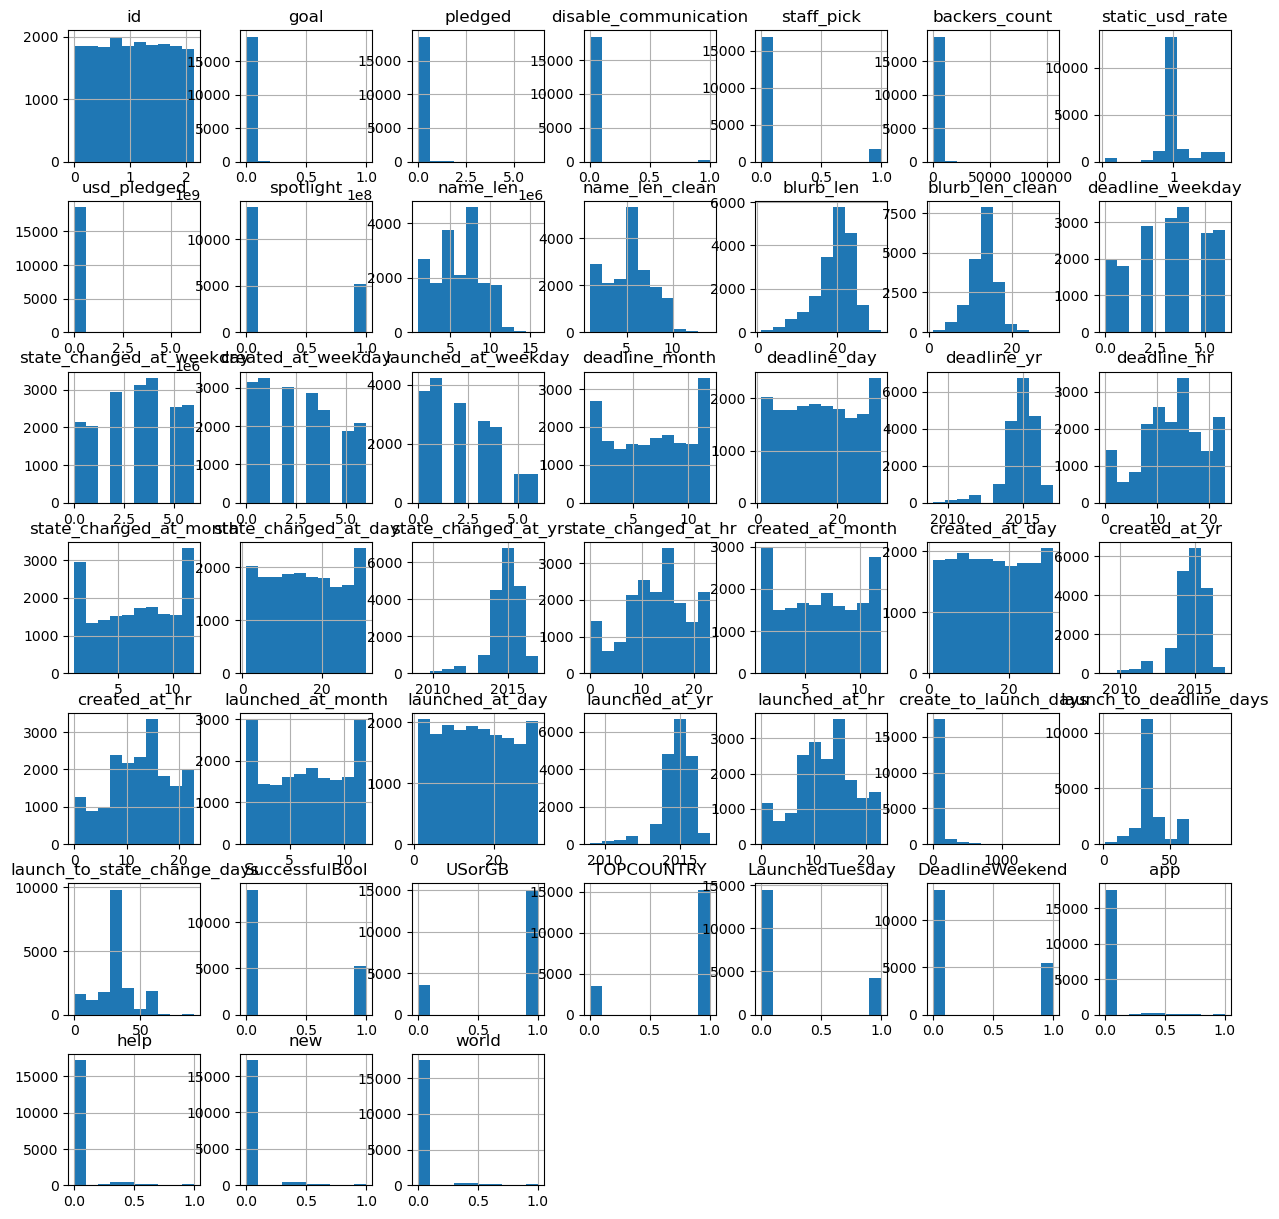

                 id          goal       pledged  disable_communication  \
count  1.869500e+04  1.869500e+04  1.869500e+04           18695.000000   
mean   1.070657e+09  8.910581e+04  1.962525e+04               0.011072   
std    6.161784e+08  1.105529e+06  1.174396e+05               0.104644   
min    1.645550e+05  1.000000e+00  0.000000e+00               0.000000   
25%    5.447831e+08  4.000000e+03  2.000000e+01               0.000000   
50%    1.070176e+09  1.500000e+04  6.170000e+02               0.000000   
75%    1.603445e+09  5.000000e+04  5.403000e+03               0.000000   
max    2.147388e+09  1.000000e+08  6.225355e+06               1.000000   

         staff_pick  backers_count  static_usd_rate   usd_pledged  \
count  18695.000000   18695.000000     18695.000000  1.869500e+04   
mean       0.094303     163.897566         1.040561  1.913196e+04   
std        0.292258    1166.252750         0.232591  1.112057e+05   
min        0.000000       0.000000         0.045641  0.00

In [84]:

# Define output and input 
starter_df_X = starter_df.drop(['SuccessfulBool'], axis=1)
X_columns = starter_df_X.columns

starter_df_Y = starter_df['SuccessfulBool']

starter_df.hist(figsize=(15,15))
plt.show()

print(starter_df.describe())

We see from the histogram there are some columns that follow a gaussian distribution, but because we have encodings estbalished for some columns, viewing a guassian distriution does not apply. Not much of the data is skewed, but because of varying range of values, we will benefit from data standardization.

id                               int64
goal                           float64
pledged                        float64
disable_communication            int64
country                         object
currency                        object
staff_pick                       int64
backers_count                    int64
static_usd_rate                float64
usd_pledged                    float64
location                        object
category                        object
spotlight                        int64
name_len                       float64
name_len_clean                 float64
blurb_len                      float64
blurb_len_clean                float64
deadline_weekday                 int64
state_changed_at_weekday         int64
created_at_weekday               int64
launched_at_weekday              int64
deadline_month                   int64
deadline_day                     int64
deadline_yr                      int64
deadline_hr                      int64
state_changed_at_month   

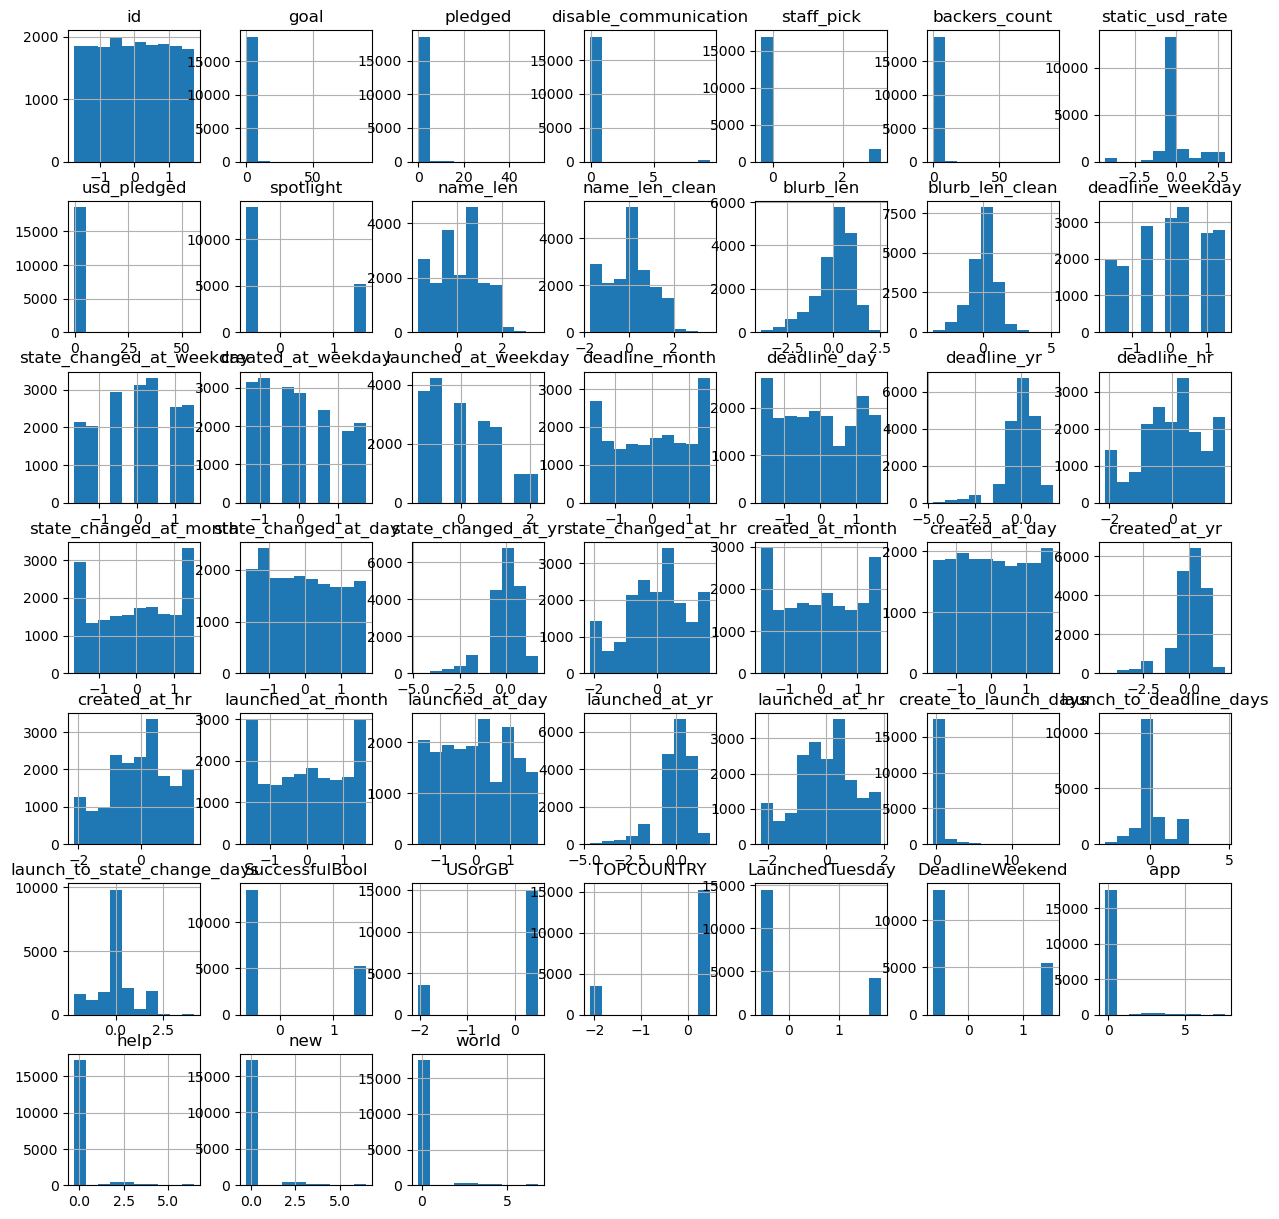

                 id          goal       pledged  disable_communication  \
count  1.869500e+04  1.869500e+04  1.869500e+04           1.869500e+04   
mean  -7.981491e-17 -4.180781e-18  3.344625e-17           6.081136e-18   
std    1.000027e+00  1.000027e+00  1.000027e+00           1.000027e+00   
min   -1.737356e+00 -8.060139e-02 -1.671138e-01          -1.058133e-01   
25%   -8.534674e-01 -7.698402e-02 -1.669435e-01          -1.058133e-01   
50%   -7.802522e-04 -6.703377e-02 -1.618599e-01          -1.058133e-01   
75%    8.646882e-01 -3.537388e-02 -1.211059e-01          -1.058133e-01   
max    1.747480e+00  9.037623e+01  5.284331e+01           9.450609e+00   

         staff_pick  backers_count  static_usd_rate   usd_pledged  \
count  1.869500e+04   1.869500e+04     1.869500e+04  1.869500e+04   
mean   4.256795e-17  -1.064199e-17    -2.873337e-16 -1.520284e-18   
std    1.000027e+00   1.000027e+00     1.000027e+00  1.000027e+00   
min   -3.226800e-01  -1.405372e-01    -4.277673e+00 -1.72

In [85]:
# Look at the datatype and determine which numeric values we have
print(starter_df.dtypes)

# Grabe the numeric coluumns for standardization
numeric_cols = starter_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numeric_cols)

scaler = StandardScaler()
starter_df[numeric_cols] = scaler.fit_transform(starter_df[numeric_cols])

starter_df.hist(figsize=(15,15))
plt.show()

print(starter_df.describe())

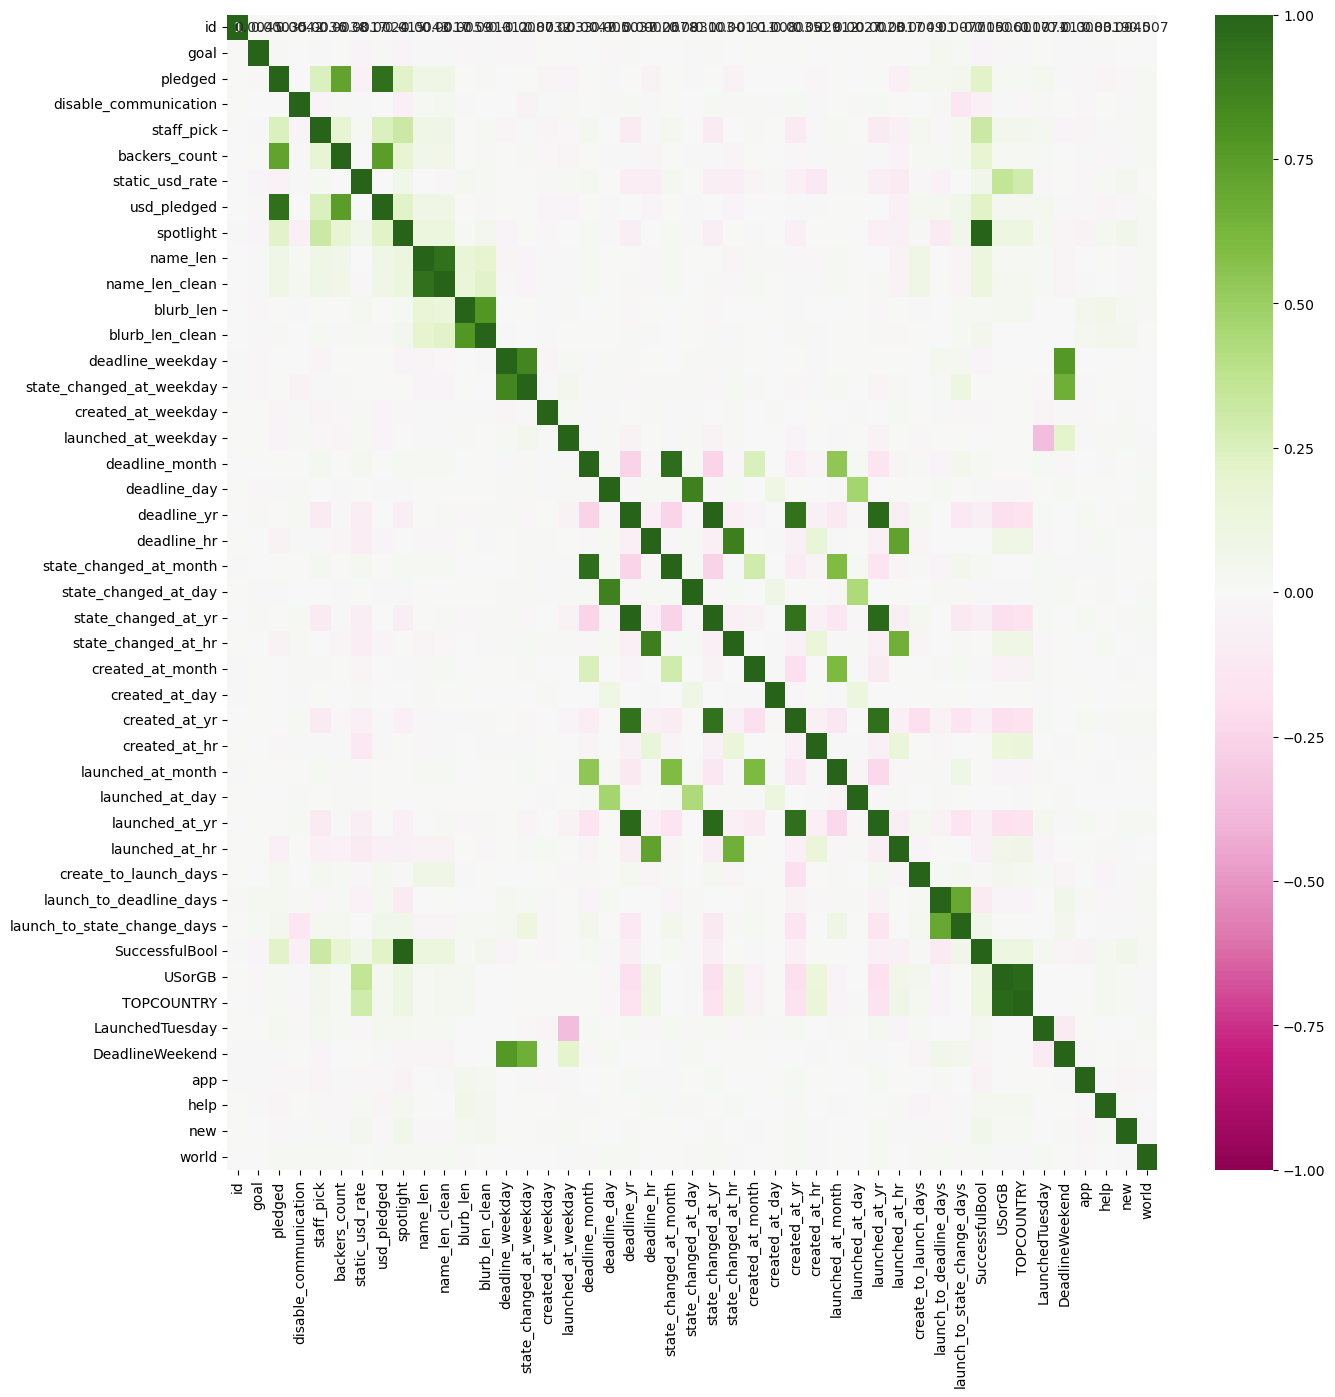

In [86]:
# View the heat map
plt.figure(figsize=(15,15))
sns.heatmap(starter_df[numeric_cols].corr(), annot=True, vmin=-1, vmax=1, cmap='PiYG')
plt.show()

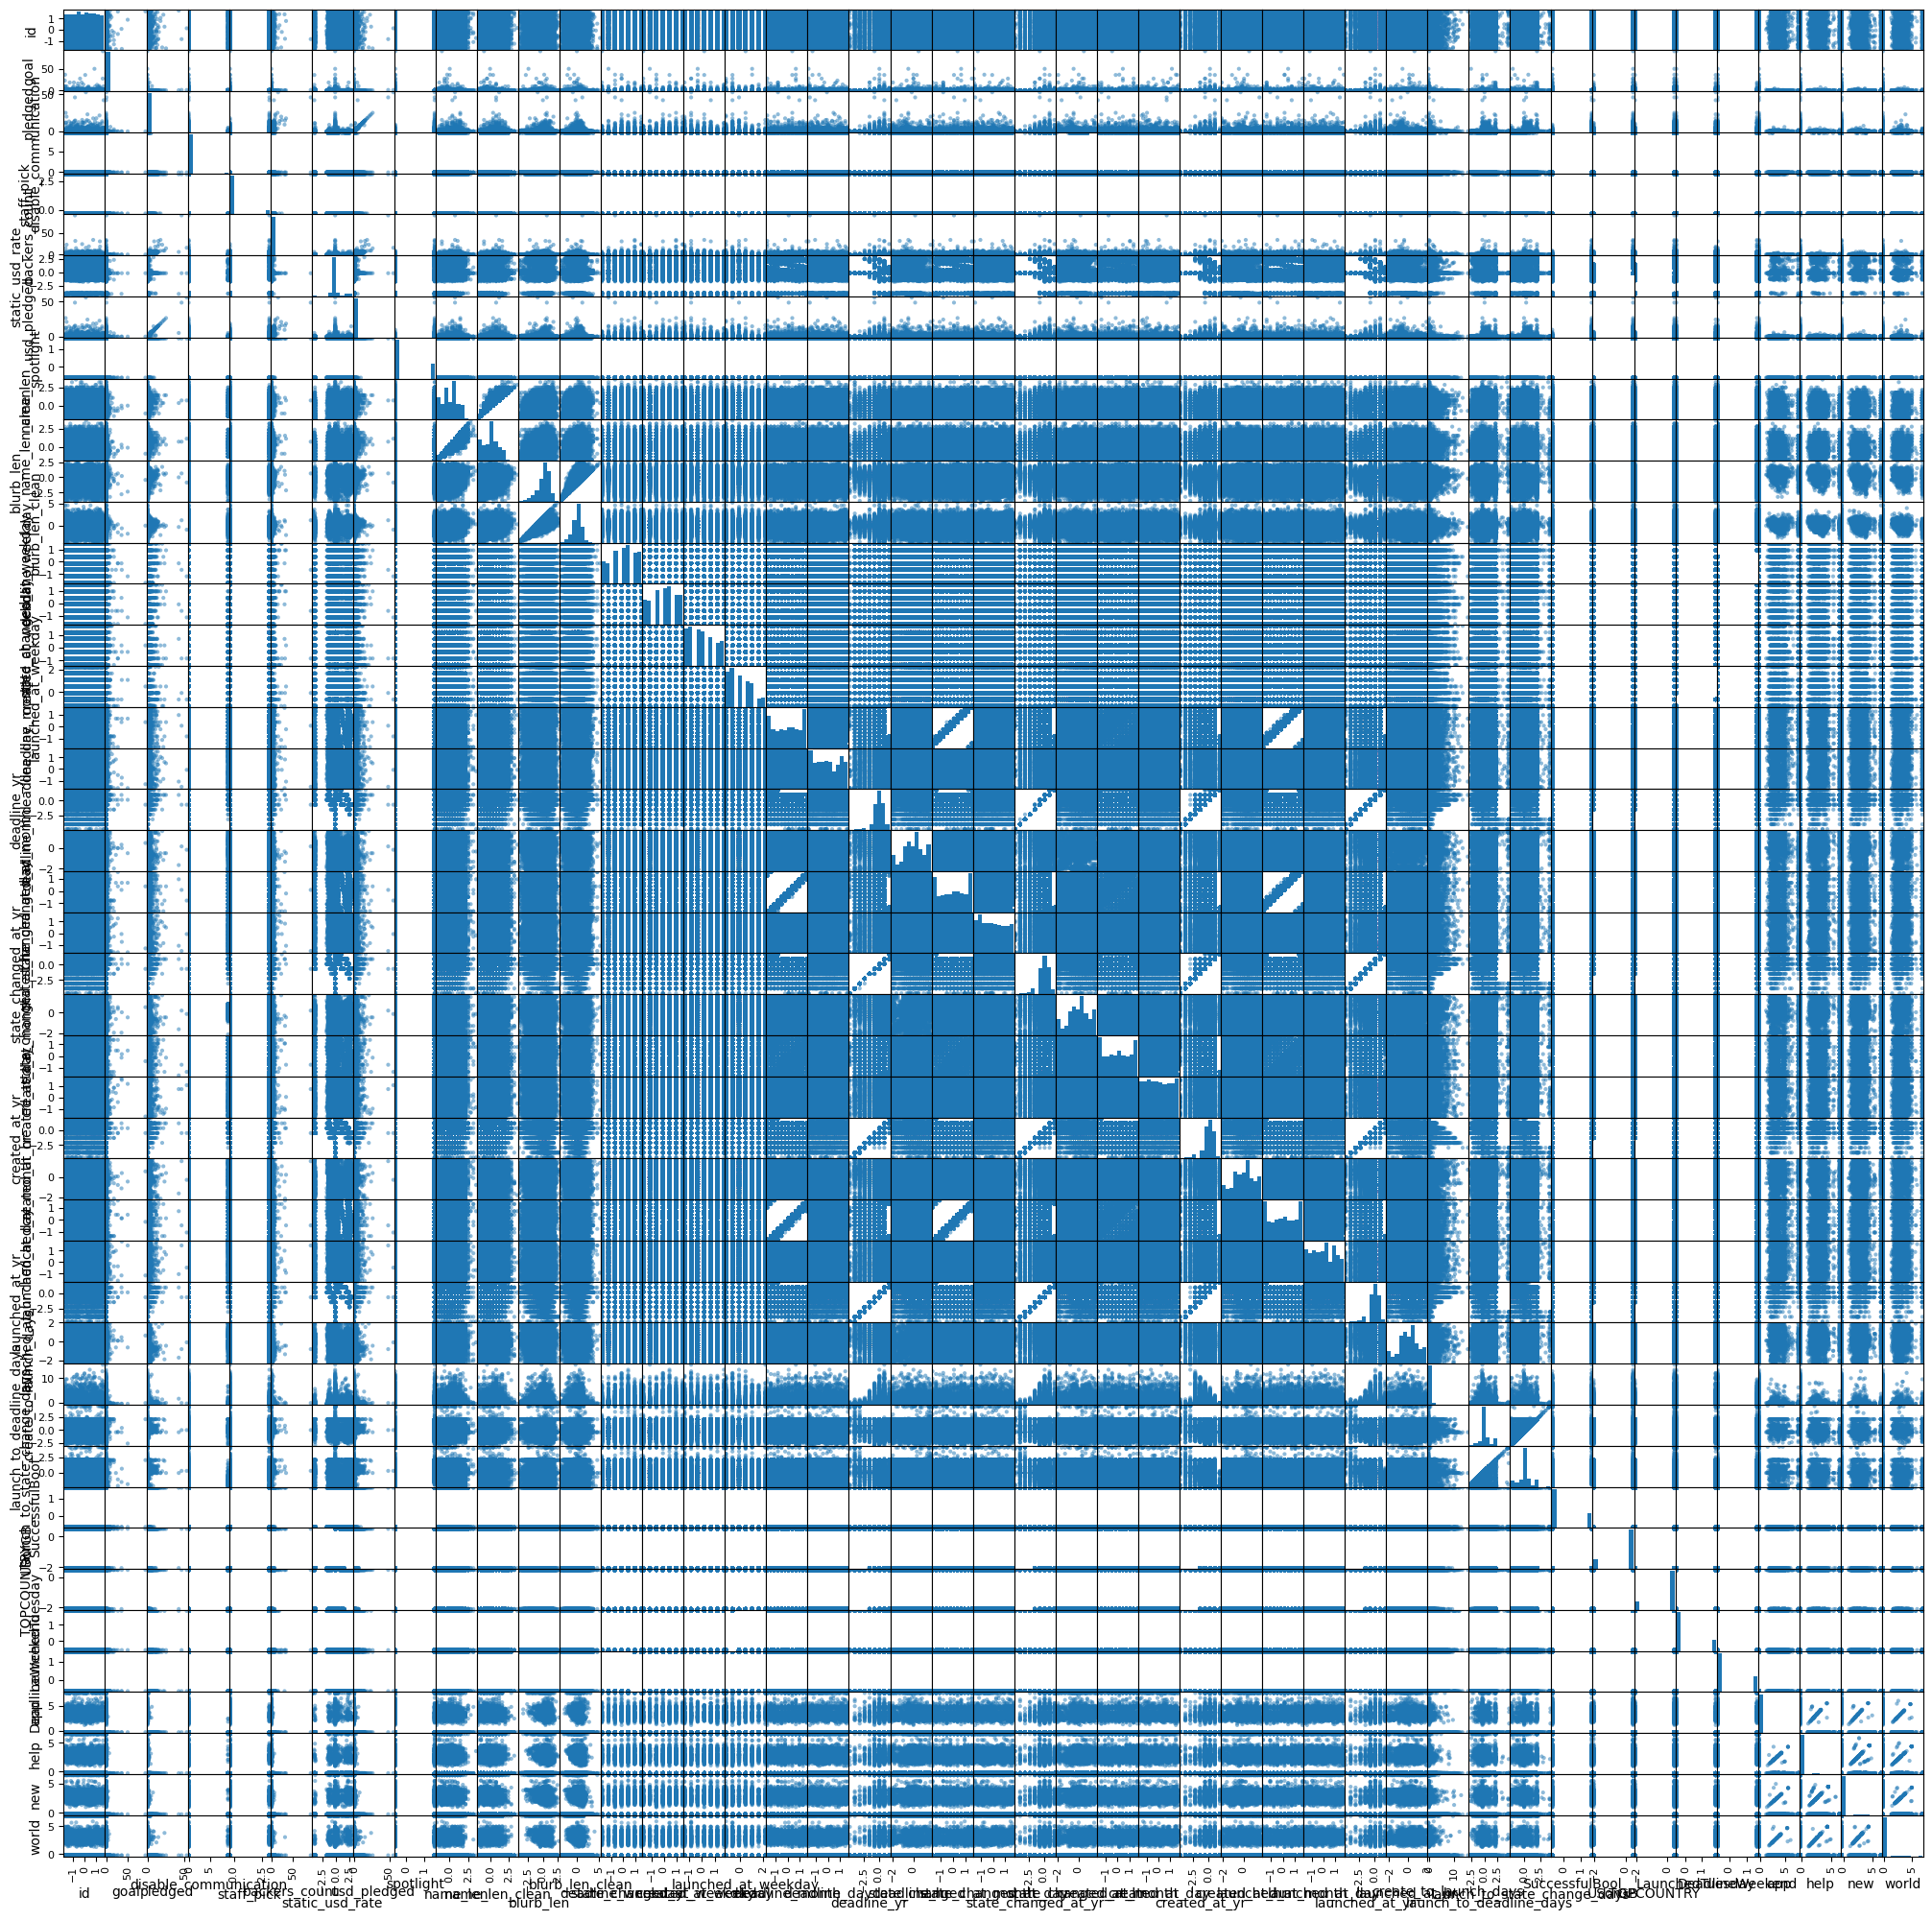

In [92]:
# Scatter plot of all data
scatter_matrix(starter_df[numeric_cols], figsize=(25,25))
plt.show()

From the correlation heatmap, we can see that there isn’t much correlation between the frequency of words in the blurb and the success of the company. Interestingly, if a campaign was spotlighted, there is a strong correlation with its success, whereas the pledged amount is only slightly positively correlated with the campaign's success. The output is also slightly positively correlated with whether the user disabled communication. We observe that usd_pledged and pledged are highly positively correlated due to their linear relationship, so we can likely drop one of these columns. The word frequencies are not strongly correlated with each other. Overall, the scatter matrix reveals that most correlated points do not show a distinct positive correlation or a clear trend.